In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
dataset=pd.read_csv('/content/drive/MyDrive/winddata2010.csv')

In [ ]:
dataset

,Year,Month,Day,Hour,Minute,wind direction at 100m (deg),wind speed at 100m (m/s),air temperature at 100m (C),air pressure at 100m (Pa)
0,2012,1,1,0,0,289.04,12.78,-10.99,66680
1,2012,1,1,0,5,289.20,12.83,-10.95,66680
2,2012,1,1,0,10,289.48,12.87,-10.90,66690
3,2012,1,1,0,15,289.77,12.90,-10.86,66690
4,2012,1,1,0,20,290.04,12.90,-10.83,66700
...,...,...,...,...,...,...,...,...,...
105115,2012,12,31,23,35,290.03,12.47,-11.18,66660
105116,2012,12,31,23,40,289.75,12.54,-11.14,66670
105117,2012,12,31,23,45,289.52,12.61,-11.09,66670
105118,2012,12,31,23,50,289.28,12.66,-11.06,66670


In [4]:
data=dataset.reset_index()['wind speed at 100m (m/s)']

In [38]:
data

array([[0.16508938],
       [0.18243954],
       [0.1913775 ],
       ...,
       [0.08307045],
       [0.08990536],
       [0.09200841]])

In [39]:
len(data)

4320

In [40]:
data=data[0:4320]

In [41]:
data

array([[0.16508938],
       [0.18243954],
       [0.1913775 ],
       ...,
       [0.08307045],
       [0.08990536],
       [0.09200841]])

In [42]:
data.shape

(4320, 1)

In [43]:
data=np.array(data)

In [44]:
data

array([[0.16508938],
       [0.18243954],
       [0.1913775 ],
       ...,
       [0.08307045],
       [0.08990536],
       [0.09200841]])

In [45]:
data=data.reshape(-1,1)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data)

In [92]:
data.shape

(4320, 1)

In [48]:
train_size=int(len(data))*0.80

In [49]:
train_size=int(train_size)

In [50]:
test_size=len(data)-train_size

In [51]:
test_size=int(test_size)

In [52]:
data

array([[0.16508938],
       [0.18243954],
       [0.1913775 ],
       ...,
       [0.08307045],
       [0.08990536],
       [0.09200841]])

In [53]:
traindata=data[0:train_size,:]
testdata=data[train_size:len(data),:1]

In [54]:
def create(dataset,timesteps):
    datax,datay=[],[]
    for i in range(len(dataset)-timesteps-1):
        a=dataset[i:(i+timesteps),0]
        datax.append(a)
        datay.append(dataset[i+timesteps,0])
    return np.array(datax),np.array(datay)

In [55]:
time_step=288
xtrain,ytrain=create(traindata,time_step)
xtest,ytest=create(testdata,time_step)


In [56]:
xtrain.shape

(3167, 288)

In [57]:
test_size

864

In [58]:
xtrain.shape[0]

3167

In [59]:
#[samples,timesteps,features]
xtrain=xtrain.reshape(xtrain.shape[0],288,1)

In [60]:
xtrain.shape


(3167, 288, 1)

In [61]:
xtest=xtest.reshape(xtest.shape[0],288,1)

In [80]:
import warnings
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
#from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=(xtrain.shape[1],1)))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer='adam')
model_cnn.summary()

In [82]:
cnn_history = model_cnn.fit(xtrain, ytrain,validation_data=(xtest,ytest),epochs=10,batch_size=32)

Epoch 1/10
99/99 [==============================] - 6s 45ms/step - loss: 0.0310 - val_loss: 0.0045
Epoch 2/10
99/99 [==============================] - 4s 41ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 3/10
99/99 [==============================] - 4s 40ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 4/10
99/99 [==============================] - 4s 44ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 5/10
99/99 [==============================] - 5s 46ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/10
99/99 [==============================] - 4s 44ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/10
99/99 [==============================] - 4s 44ms/step - loss: 9.5839e-04 - val_loss: 9.0650e-04
Epoch 8/10
99/99 [==============================] - 4s 42ms/step - loss: 8.9104e-04 - val_loss: 7.3748e-04
Epoch 9/10
99/99 [==============================] - 4s 43ms/step - loss: 8.7561e-04 - val_loss: 5.3801e-04
Epoch 10/10
99/99 [==============================] - 4s 45ms/step - loss: 7.4740e-04 

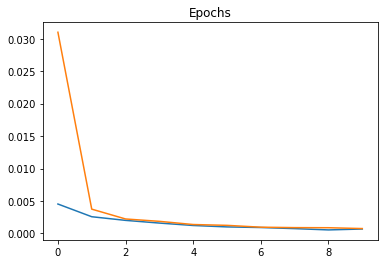

In [83]:
plt.plot(cnn_history.history['val_loss'],label='loss')
plt.plot(cnn_history.history['loss'],label='loss')
plt.title('Epochs')
plt.show()

In [84]:
y2=model_cnn.predict(xtest)
y2.shape

(575, 1)

In [85]:
y2=scaler.inverse_transform(y2)
print(y2[1:10])
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(ytest)

[[0.03982798]
 [0.04274327]
 [0.04508151]
 [0.04718751]
 [0.04884772]
 [0.0503238 ]
 [0.05142939]
 [0.05223806]
 [0.05228462]]


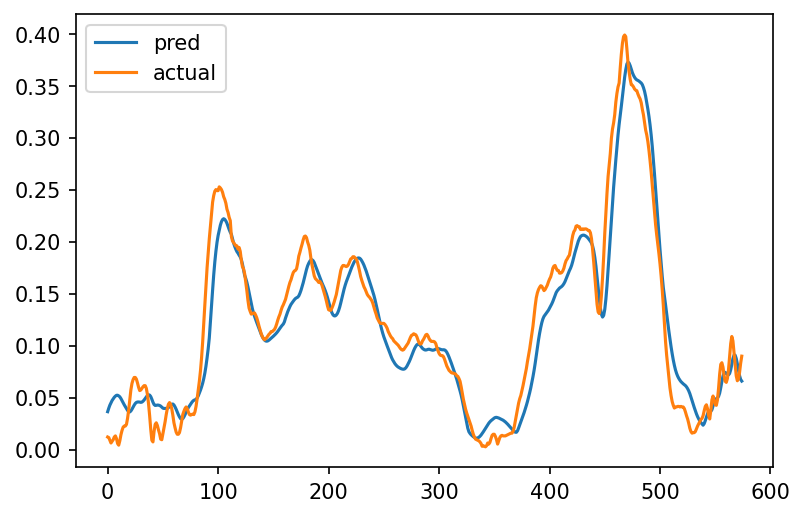

In [86]:
plt.figure(dpi=150)
plt.plot(y2,label='pred')
plt.plot(ytest,label='actual')
plt.legend()

In [97]:
def accuracy(pre,act):
    mse=abs(pre-act).mean()
    print(mse)

In [98]:
accuracy(y2,ytest)

0.019629513046651476


In [118]:
features = Model(inputs=model_cnn.inputs, outputs=model_cnn.layers[3].output)
train= features.predict(xtrain)
test = features.predict(xtest)

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [127]:
model=Sequential()

In [128]:
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))

In [102]:
model.add(LSTM(100,return_sequences=True))

In [103]:
model.add(LSTM(50))

In [104]:
model.add(Dense(1))

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 288, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 288, 100)          60400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 101,051
Trainable params: 101,051
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(loss='mse',optimizer='adam')

In [107]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=32)

Epoch 1/5
99/99 [==============================] - 66s 610ms/step - loss: 0.0060 - val_loss: 8.9283e-04
Epoch 2/5
99/99 [==============================] - 61s 612ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 3/5
99/99 [==============================] - 58s 585ms/step - loss: 0.0012 - val_loss: 7.5990e-04
Epoch 4/5
99/99 [==============================] - 57s 573ms/step - loss: 0.0010 - val_loss: 4.7517e-04
Epoch 5/5
99/99 [==============================] - 55s 559ms/step - loss: 8.3198e-04 - val_loss: 3.3445e-04


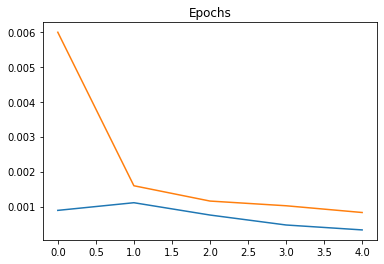

In [108]:
plt.plot(history.history['val_loss'],label='loss')
plt.plot(history.history['loss'],label='loss')
plt.title('Epochs')
plt.show()

In [109]:
y2=model.predict(xtest)

In [110]:
y2=y2.reshape(-1,1)

In [111]:
y2=scaler.inverse_transform(y2)



Text(0, 0.5, 'wind speed in m/s')

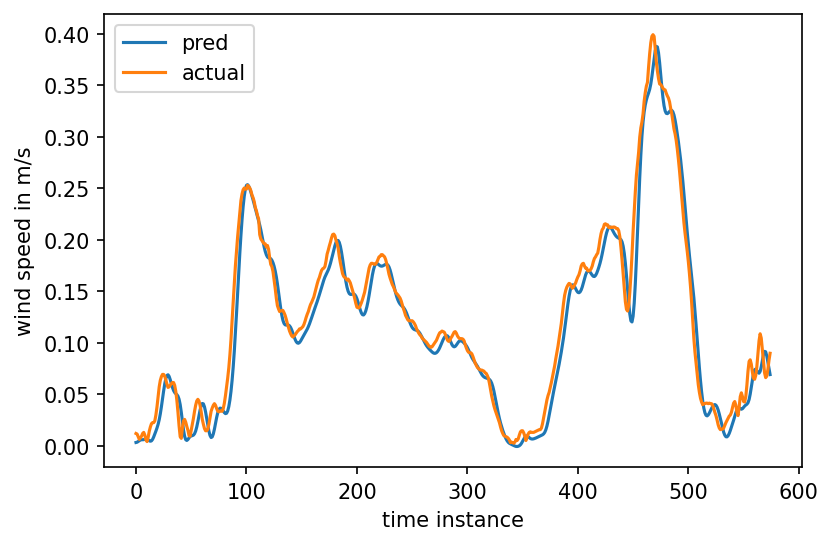

In [129]:
plt.figure(dpi=150)
plt.plot(y2,label='pred')
plt.plot(ytest,label='actual')
plt.legend()
plt.xlabel('time instance')
plt.ylabel('wind speed in m/s')

In [130]:
ytest=ytest.reshape(-1,1)

In [114]:
ytest=scaler.inverse_transform(ytest)

In [131]:
def accuracy(pre,act):
    mse=abs(pre-act).mean()
    print(mse)

In [132]:
accuracy(y2,ytest)

0.012959507523829322
